<div style="font-family: Trebuchet MS; background-color: #f8f9fa; border-left: 5px solid #1b4332; padding: 12px;">
    <h1 style="font-size: 30px; color: #081c15; text-align: center; line-height: 1.25;">feature selection and categorical encoding</h1>
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;"><b>obesity dataset from  UCI Machine Learning Repository. </b></h2>
    <hr style="border-top: 2px solid #264653;">
    <h3 style="font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri</strong></h3>
</div>


<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻1️⃣ Importing Libraries 🔻
</p>


In [1]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


from sklearn.pipeline import Pipeline
import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)



### The data set `obesity` contains 18 predictor variables.

In [2]:
# Load the data
obesity = pd.read_csv("..Data/ObesityDataSet.csv")
# Inspect the data
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    data cleaning
</p>


In [3]:
# Checking for NaN (missing) values
missing_values = obesity.isnull().sum()

# Checking for duplicated rows
duplicates = obesity.duplicated().sum()

print(f"checking missing value\n{missing_values}")
print(f"duplicated values\n{duplicates}")

checking missing value
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
duplicated values
24


In [4]:
# Removing duplicated rows from the dataset
obesity = obesity.drop_duplicates()
#check if ther is any remining duplicated values
obesity.duplicated().sum()

0

<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    encoding categorical variables
</p>



In [5]:
columns = obesity.columns
categorical_columns = [c for c in columns if obesity[c].dtypes == 'object']
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [6]:
for i in categorical_columns:
    print(f"{i} : {obesity[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### Split the data into `X` and `y`

In order to use a linear regression model, you'll need to split the data into two parts: the predictor variables and an outcome variable. Do this by splitting the data into a DataFrame of predictor variables called `X` and a Series of outcome variables `y`.

In [7]:
X = obesity.iloc[:,:-1]
y = obesity.iloc[:, -1]
y = pd.DataFrame(y, columns=['NObeyesdad'])

In [8]:
labels = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a dictionary to map labels to numbers starting from 1
label_to_number = {label: i + 1 for i, label in enumerate(labels)}

# Map the condition labels to numeric values
y['NObeyesdad'] = y['NObeyesdad'].map(label_to_number)
y.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,3


# `Gender`, `FAVC`, `SMOKE`, `SCC` , `family_history_with_overweight` (Binary Categories):
These features have only two categories and are best represented by a binary format.

# `CALC`, `MTRANS` (Multi-Category Nominal):

These features are nominal with no inherent order. One-hot encoding creates new columns indicating the presence of each possible value.

# `CAEC` (Ordinal Category):

If 'CAEC' has an inherent order (e.g., never, sometimes, frequently, always), ordinal encoding can be used, where each category is assigned an integer based on the order.

In [9]:
# Custom function for binary encoding
def binary_encode(obesity, columns):
    obesity = obesity.copy() #ensure that the function is safe and does not modify the DataFrame passed to it unexpectedly.
    label_encoder = LabelEncoder()
    for col in columns:
        obesity[col] = label_encoder.fit_transform(obesity[col])
    return obesity

# Columns for binary encoding, one-hot encoding, and category encoding
binary_columns = ['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight']
onehot_encoded_columns = ['CALC', 'MTRANS']
category_encoded_columns = ['CAEC']

# Creating a pipeline for binary encoding
binary_pipeline = Pipeline(steps=[
    ('binary_encode', FunctionTransformer(binary_encode, kw_args={'columns': binary_columns}))
])

# Creating a pipeline for category encoding
category_pipeline = Pipeline(steps=[
    ('category_encode', ce.OrdinalEncoder(cols=category_encoded_columns))
])

# Creating the ColumnTransformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('binary', binary_pipeline, binary_columns),
        ('onehot', OneHotEncoder(), onehot_encoded_columns),
        ('category', category_pipeline, category_encoded_columns)
    ],
    remainder='passthrough'  # leave the rest of the columns unchanged
)

# Applying the ColumnTransformer to the DataFrame
X_categorical_transformed = categorical_transformer.fit_transform(X)

# Getting new column names
binary_encoded_names = binary_columns  # Binary encoded columns names remain the same
onehot_encoded_names = categorical_transformer.named_transformers_['onehot'].get_feature_names_out(onehot_encoded_columns)
category_encoded_names = categorical_transformer.named_transformers_['category'].get_feature_names_out(category_encoded_columns)

new_columns = binary_encoded_names + list(onehot_encoded_names) + list(category_encoded_names)
new_columns += [col for col in X.columns if col not in binary_columns + onehot_encoded_columns + category_encoded_columns]

# Creating the new DataFrame with the new column names
obesity_encoded_obesity = pd.DataFrame(X_categorical_transformed, columns=new_columns)

obesity_encoded_obesity.head()

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [10]:
obesity_encoded_obesity.describe()

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,0.883565,0.021083,0.045999,0.825108,0.000479,0.033541,0.661236,0.304744,0.218495,0.003354,0.005271,0.746526,0.026354,1.217058,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,0.500103,0.320823,0.143695,0.209533,0.379966,0.021890,0.180088,0.473403,0.460409,0.413324,0.057831,0.072426,0.435104,0.160223,0.572070,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
print(len(obesity_encoded_obesity), len(y))

2087 2087


In [12]:
#Performing a Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obesity_encoded_obesity, y, test_size=0.25, random_state=42)



<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    Evaluating a Logistic Regression Model
</p>


Create a logistic regression model called `lr`. Include the parameter `max_iter=1000` to make sure that the model will converge when you try to fit it.

In [13]:
lr = LogisticRegression(max_iter=1000)

### Fit the model

Use the `.fit()` method on `lr` to fit the model to `X` and `y`.

In [14]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Model accuracy

A model's _accuracy_ is the proportion of classes that the model correctly predicts. is Compute and print the accuracy of `lr` by using the `.score()` method. What percentage of respondents did the model correctly predict as being either obese or not obese? You may want to write this number down somewhere so that you can refer to it during future tasks.

In [15]:
print(lr.score(X_train,y_train))

0.8306709265175719



<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    Wrapper Methods
</p>



## Sequential Forward Selection

Now that you've created a logistic regression model and evaluated its performance, we are ready to do some feature selection. 

In [16]:
#we alrady importing this package: from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(lr,
         k_features=10,
         forward = True,
         floating=False,
         cv=0,
         scoring='accuracy')

### Fit the model

In [17]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(10, 10), scoring='accuracy')

### Inspect the results

In [18]:
print(sfs.subsets_[10])

{'feature_idx': (0, 1, 5, 6, 8, 9, 11, 15, 16, 17), 'cv_scores': array([0.83450479]), 'avg_score': 0.8345047923322684, 'feature_names': ('Gender', 'FAVC', 'CALC_Always', 'CALC_Frequently', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike', 'Age', 'Height', 'Weight')}


### Chosen features and model accuracy

Use the dictionary `sfs.subsets_[9]` to print a tuple of chosen feature names. Then use it to print the accuracy of the model after doing sequential forward selection. How does this compare to the model's accuracy on all available features?

In [19]:
# Print the chosen feature names
print(print(sfs.subsets_[10]['feature_names']))
# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[10]['avg_score'])

('Gender', 'FAVC', 'CALC_Always', 'CALC_Frequently', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike', 'Age', 'Height', 'Weight')
None
0.8345047923322684


### Visualize model accuracy

It can be helpful to visualize the results of sequential forward selection and see how accuracy is affected as each feature is added. Use the code `plot_sfs(sfs.get_metric_dict())` to plot the model accuracy as a function of the number of features used. Make sure to show your plot as well.

<Figure size 2000x3000 with 0 Axes>

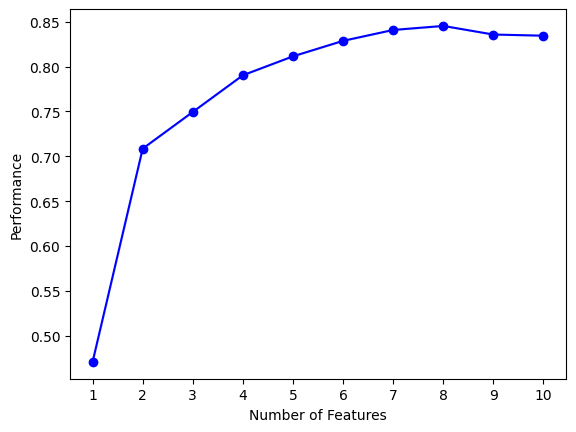

In [20]:
%matplotlib inline

plt.figure(figsize=(20, 30))  # Define the figure size before plotting
plot_sfs(sfs.get_metric_dict())  # Your plotting function should come after setting the figure size
plt.show()



<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
   Grid Search
</p>



In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for Grid Search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 500, 1000]}


In [22]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [23]:
# Best parameters
best_params = grid_search.best_params_

# Initialize the logistic regression model with the best parameters
best_lr = LogisticRegression(**best_params)

# Cross-validation scores
cross_val_scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')

# Print the best parameters and cross-validation scores
print("Best Parameters:", best_params)
print("Cross-Validation Accuracy Scores:", cross_val_scores)

Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
Cross-Validation Accuracy Scores: [0.85303514 0.85942492 0.84345048 0.86900958 0.86900958]


In [24]:
# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()

# Print mean and standard deviation
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_score}")

# Retrain the model on the entire dataset
best_lr.fit(obesity_encoded_obesity, y)

# If you have a separate test set, evaluate the model on it
# test_accuracy = best_lr.score(X_test, y_test) # Uncomment if you have a test set

# Final model evaluation
final_accuracy = best_lr.score(X_test, y_test)

# Print the final model accuracy
print(f"Final Model Accuracy on Training Data: {final_accuracy}")

Mean Cross-Validation Accuracy: 0.8587859424920128
Standard Deviation of Cross-Validation Accuracy: 0.009774478300816836
Final Model Accuracy on Training Data: 0.8620689655172413
